<a href="https://colab.research.google.com/github/andersonftdj/data_science/blob/master/PROJETO_Detec%C3%A7%C3%A3o_de_Fraudes_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="https://images.unsplash.com/photo-1592772874383-d08932d29db7?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=699&q=80" width="40%"></p>

Dentre essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="https://images.unsplash.com/photo-1620714223084-8fcacc6dfd8d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor ou igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [22]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
!pip install -q scikit-plot


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler;
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import scikitplot as skplt


# instalar a biblioteca scikit-plot


sns.set_style('dark')

Para facilitar a aquisição dos dados, um *link* com acesso direto ao `csv` foi criado. Com isso, foi importado o conjunto de dados usando o método `pd.read_csv()`.

In [23]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"
df = pd.read_csv(file_path)

In [24]:
print("Dimensões do dataframe original\t : {}".format(df.shape))

df_bkp = df.copy()

# Criando o conjunto de teste
test = df.sample(frac=0.15)

# Removendo do conjunto original
df = df.drop(test.index)

print("Dimensões do dataframe de treino : {}".format(df.shape))
print("Dimensões do dataframe de teste  : {}".format(test.shape))


Dimensões do dataframe original	 : (284807, 31)
Dimensões do dataframe de treino : (242086, 31)
Dimensões do dataframe de teste  : (42721, 31)


## Análise Exploratória

<p align=center>
<img src="https://image.freepik.com/vetores-gratis/lupa-sobre-uma-impressao-digital_1010-443.jpg" width=40% >
</p>



Após os dados passarem pelo PCA as variáveis foram descaracterizadas e as únicas que mantiveram o nome foram:

* **Time**: Indica o o tempo desde o inícios da coleta dos dados até a transação ser efetivada

* **Amount**: O valor transacionado

* **Class**: Indica se a operação foi fraude(1) ou não (0)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242086 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    242086 non-null  float64
 1   V1      242086 non-null  float64
 2   V2      242086 non-null  float64
 3   V3      242086 non-null  float64
 4   V4      242086 non-null  float64
 5   V5      242086 non-null  float64
 6   V6      242086 non-null  float64
 7   V7      242086 non-null  float64
 8   V8      242086 non-null  float64
 9   V9      242086 non-null  float64
 10  V10     242086 non-null  float64
 11  V11     242086 non-null  float64
 12  V12     242086 non-null  float64
 13  V13     242086 non-null  float64
 14  V14     242086 non-null  float64
 15  V15     242086 non-null  float64
 16  V16     242086 non-null  float64
 17  V17     242086 non-null  float64
 18  V18     242086 non-null  float64
 19  V19     242086 non-null  float64
 20  V20     242086 non-null  float64
 21  V21     24

Com método  `info` pudemos ter um bom overview das variáveis disponíveis no dataset. Temos 242086 variáveis e não há nenhum valor ausente. Ao todo são 31 variáveis, sendo 30 delas `float64` e 1, a variável alvo da nossa previsão, `int64`. 

Como a variável `Time` representa o tempo, vamos transforma-la em um tipo de dado apropriado.

In [26]:
print('Tipo de dado original: \t', df.Time.dtype)
df['Time'] = df['Time'].apply(lambda x: datetime.fromtimestamp(x))
print('Tipo de dado alterado: \t', df.Time.dtype)

Tipo de dado original: 	 float64
Tipo de dado alterado: 	 datetime64[ns]


Com todos os tipos de dados tratados, verificaremos a distribuição das variáveis:

In [27]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000
mean,0.000085,0.000287,0.000345,0.000970,-0.000394,0.000634,0.000283,-0.000641,0.000060,-0.000382,-0.000641,-0.000328,0.000077,-0.001114,-0.000634,0.000273,-0.000141,-0.000762,-0.000392,0.000242,0.000109,0.000268,-0.000054,0.000683,-0.000241,0.000248,-0.000436,-0.000271,88.407380,0.001731
std,1.957006,1.646614,1.518562,1.415870,1.385247,1.335237,1.246079,1.200069,1.098240,1.089233,1.020117,0.999077,0.995388,0.959126,0.915611,0.877125,0.852620,0.838771,0.814657,0.763689,0.735647,0.725319,0.623297,0.605169,0.520813,0.482615,0.405780,0.331101,248.052661,0.041567
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.553697,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-6.938297,-54.497720,-34.830382,-9.499423,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,-0.920230,-0.598385,-0.890956,-0.847618,-0.691715,-0.767899,-0.554248,-0.209056,-0.643967,-0.535052,-0.762286,-0.405939,-0.647195,-0.426819,-0.582610,-0.467923,-0.483934,-0.499337,-0.458383,-0.211786,-0.228236,-0.541975,-0.161775,-0.353807,-0.317986,-0.326893,-0.070901,-0.053104,5.630000,0.000000
50%,0.017476,0.065866,0.180806,-0.019236,-0.054752,-0.274532,0.040273,0.022123,-0.051212,-0.092701,-0.033938,0.140113,-0.013734,0.049721,0.047918,0.066889,-0.065715,-0.004829,0.002617,-0.062605,-0.028825,0.007770,-0.011161,0.041213,0.016624,-0.052178,0.001329,0.011169,22.000000,0.000000
75%,1.315550,0.803607,1.027970,0.745801,0.612227,0.399141,0.571090,0.327346,0.599000,0.453282,0.737806,0.617861,0.662415,0.492868,0.647115,0.524059,0.400442,0.500571,0.458703,0.133301,0.186514,0.528582,0.147729,0.439820,0.350673,0.241674,0.091125,0.078234,77.520000,0.000000
max,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,4.712398,5.591971,38.117209,27.202839,10.503090,22.528412,4.584549,6.070850,3.517346,31.612198,33.847808,25691.160000,1.000000


Não foi identificado discrepância aparente na análise das variáveis descaracterizadas.
Em `Amount` o valor médio das transações é de \$88, em ambas as classes, a mediana é de \$22, seu máximo de \$19656 e seu desvio padrão de \$247


Como lidaremos com um problema de classificação, vamos investigar o balanceamento da variável alvo. 

0    241667
1       419
Name: Class, dtype: int64

Fraudes: 0.1731%



[]

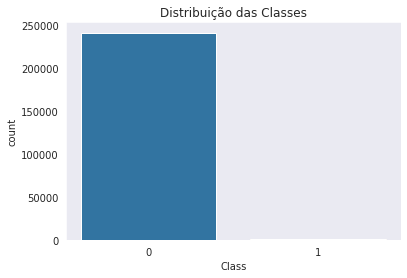

In [28]:
print(df.Class.value_counts())

print("\nFraudes: {:.4}%\n".format(df[df.Class == 1 ].shape[0] / df.shape[0]*100))


fig, ax = plt.subplots()

sns.countplot('Class', data=df, ax=ax)
ax.set_title('Distribuição das Classes')

plt.plot()

Como informado na descrição do dataset, apenas 0,17% dos dados são fraudes, portanto, como podemos ver claramente através do gráfico de barras,  nossos dados estão desbalanceados. 

Para resolução do problema, devemos estar atentos a isso para não ter dificuldade com os falsos positivos durante a fase de modelagem e avaliação. Para resolver isso temos métodos e possibilidades, mas trataremos mais isso mais a frente.

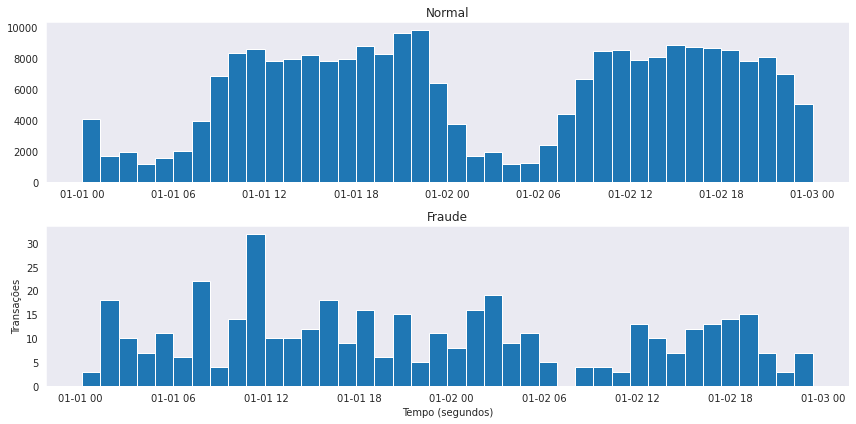

In [29]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12,6))

ax[0].hist(df.Time[ df.Class == 0], bins=40)
ax[0].set_title("Normal")

ax[1].hist(df.Time[ df.Class == 1], bins=40)
ax[1].set_title("Fraude")

plt.xlabel('Tempo (segundos)')
plt.ylabel('Transações')

plt.tight_layout()

Foi plotado o histograma da variável `Tempo` nos dois cenários, com e sem fraude, porém, além do volume de transações não foi possível encontrar diferenças significativas entre elas.

Seguindo a análise exploratória, plotamos também o boxplot das duas classes da variável alvo com relação ao valor transacionado e pudemos observar que  há uma diferença visual da distribuição de ambas, o que provavelmente contribuirá para o treinamento do modelo.


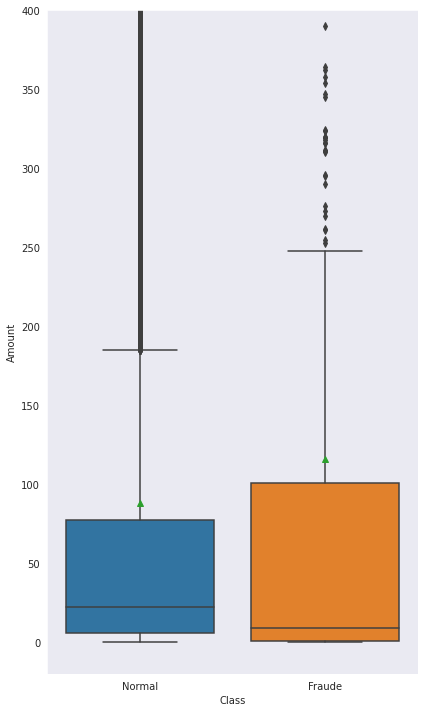

In [30]:
fig, ax = plt.subplots(figsize=(6,10), sharex=True)

sns.boxplot(df.Class, df.Amount, showmeans=True, ax=ax)

plt.ylim((-20, 400))
plt.xticks([0, 1], ['Normal', 'Fraude'])

plt.tight_layout()

O gráfico de densidade nos ajuda a comparar a distribuição entre as variáveis para cada uma das classes que nós temos e vermos quais são as mais importantes para a detecção de anomalias. 

Neste tipo de gráfico, buscamos distribuições distoantes entre si, como podemos ver nas variáveis `V3`,`V4`,, `V7`, `V17`, `V23` entre outras. 

Já distribuições como `V13`,`V15`, `V24` não são tão úteis e siginificativas na construção do nosso modelo. 


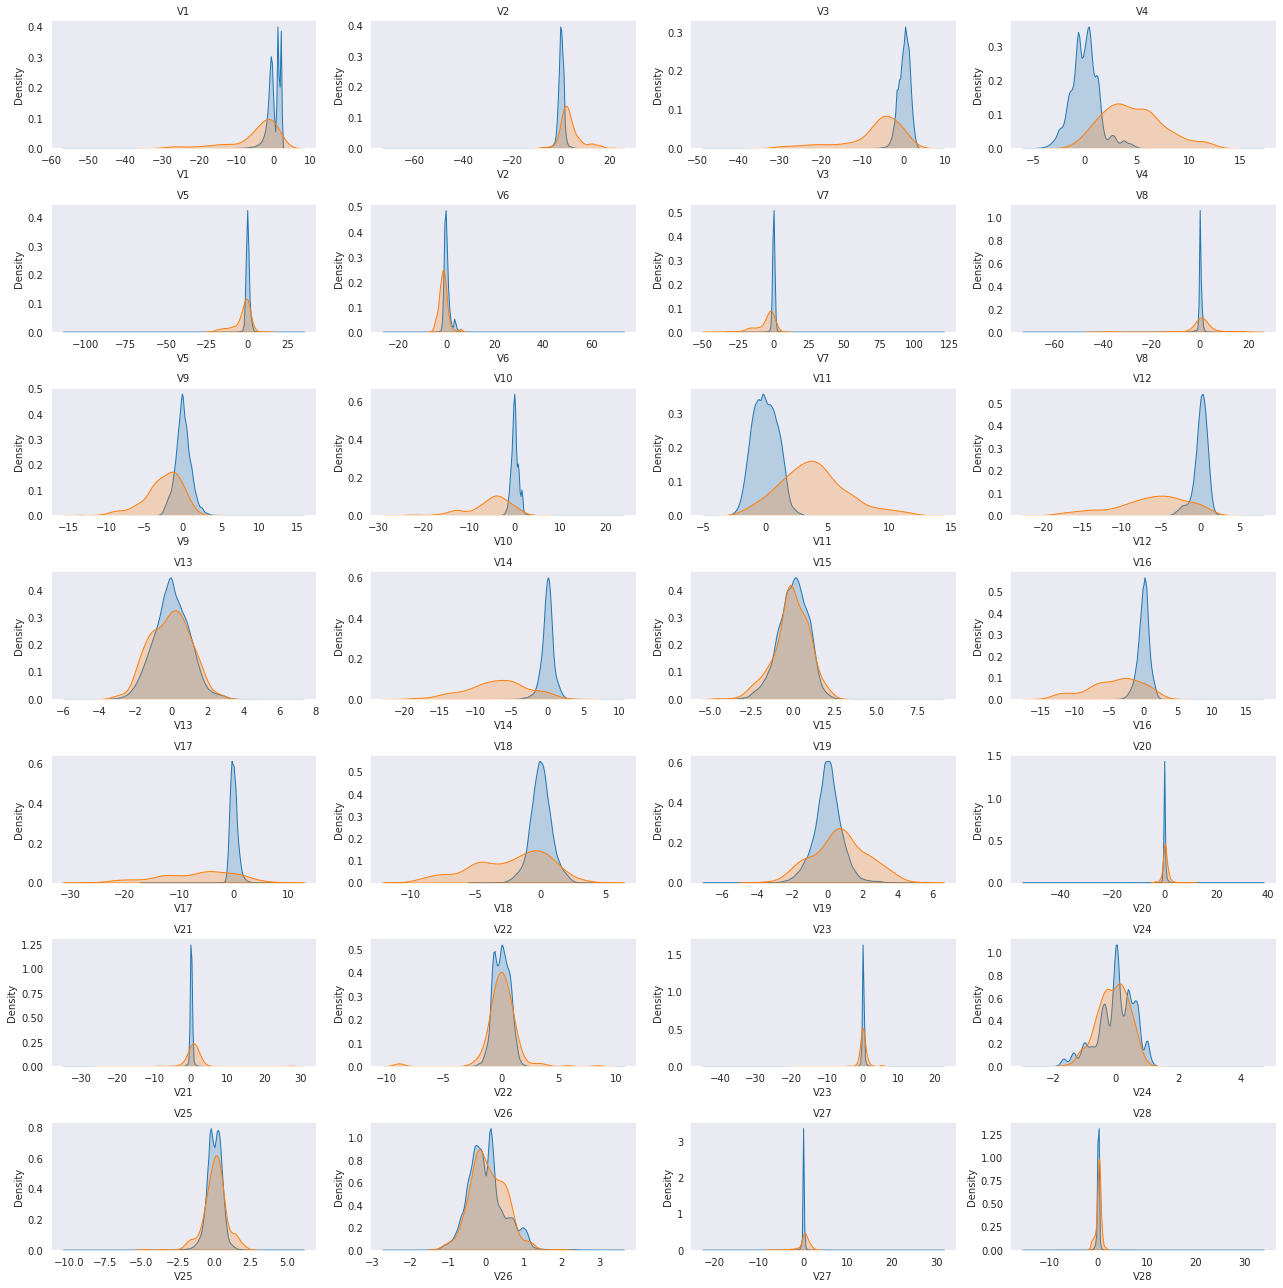

In [31]:
column_names = df.drop(['Class', 'Amount', 'Time'], axis=1).columns
# column_names = df.columns

num_plots = len(column_names)
df_class_0 = df[df.Class == 0]
df_class_1 = df[df.Class == 1]

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18, 18))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in column_names:
    idx += 1
    plt.subplot(7, 4, idx)
    sns.kdeplot(df_class_0[col], label="Class 0", shade=True)
    sns.kdeplot(df_class_1[col], label="Class 1", shade=True)
    plt.title(col, fontsize=10)
plt.tight_layout()

Resumidamente, algumas informações principais que pudemos tirar desta etapa de análise exploratória:

* O dataset trabalhado é de boa qualidade, pois não foi necessário realizar grandes modificações e também não haviam dados ausentes.

* Os dados da classe alvo estão muito desbalanceados, havendo a necessidade de reparar isto. 

* Uma vez que [PCA é uma técnica altamente sensível a variância das escalas das variáveis](https://builtin.com/data-science/step-step-explanation-principal-component-analysis), assumimos que os dados foram inicialmente padronizados. 

* As variáveis `Time` e `Amount` não estão normalizadas. 

## Preparação dos Dados

Para que os dados estejam possam alimentar o modelode Regressão Logística que será criado, nesta etapa iremos 

* **Padronização** das features `Time` e `Amount`
* **Dividisão** dos dados de treino e validação 
* **Balanceamento** dos dados  afim de evitar a baixa performance da classe 1

### Padronização
Padronizaremos as colunas `Time` e `Amount` que estão em outras ordem de grandeza usando o `StandardScaler` pois a variávels `Amount` contém outliers.

In [32]:
df_padronizado = df.copy()

std_scaler = StandardScaler()

df_padronizado['Amount'] = std_scaler.fit_transform(df_padronizado['Amount'].values.reshape(-1,1))
df_padronizado['Time'] = std_scaler.fit_transform(df_padronizado['Time'].values.reshape(-1,1))


df_padronizado

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.997476,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.246773,0
1,-1.997476,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.345562,0
3,-1.997455,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.141473,0
4,-1.997434,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.074248,0
5,-1.997434,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.341611,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641598,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.353302,0
284803,1.641619,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.256468,0
284804,1.641640,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.082754,0
284805,1.641640,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.316092,0


### Divisão 
Faremos a divisão dos dados entre conjunto de treino e validação, para termos um subconjunto para validar antes de testarmos com o conjunto separado no início do projeto.

Será usado a função `train_test_split` do sklearn. Para garantir que ambos os conjuntos terão a mesma quantidade de classes proporcionalmente, utilizamos o parâmetro `stratify=y`, informando a quantidade de classes para esse divisão.

Antes de realizarmos o split nos dados faremos a separação entre Feature Matrix - matriz com as variáveis - e Target Vector -variável alvo.

In [33]:
# Feature Matrix, Target Vector
X = df_padronizado.drop(['Class'], axis=1)
y = df_padronizado['Class']

X_train, X_val, y_train, y_val = train_test_split(X,y, stratify=y, shuffle=True, )

### Balanceamento

Como os dados estão desbalanceados, conforme visto anteriormente, podemos optar por utilizar uma técnica de balanceamento que reduz a classe mais populosa e preserva a classe minoritária, guardando os dados valiosos das detecções de fraude. Usaremos o `under sampling` da biblioteca `imblearn` para balancea-los.

1    314
0    314
dtype: int64 



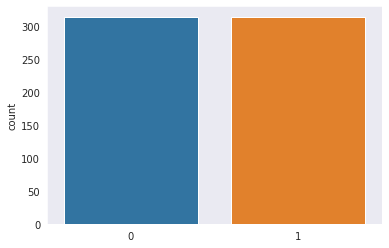

In [34]:
RUS = RandomUnderSampler()

X_res, y_res = RUS.fit_sample(X_train, y_train)

print(pd.Series(y_res).value_counts(),"\n")

sns.countplot(y_res);

Podemos ver com facilidade, que não há mais discrepância entre as classes como havia anteriormente - em contrapartida tivemos uma redução substâncial na quantidade de dados, porém, este não é o foco deste projeto.

Com os dados balanceados, plotamos a matriz de correlação das variáveis para entender se existe correlação entre elas.

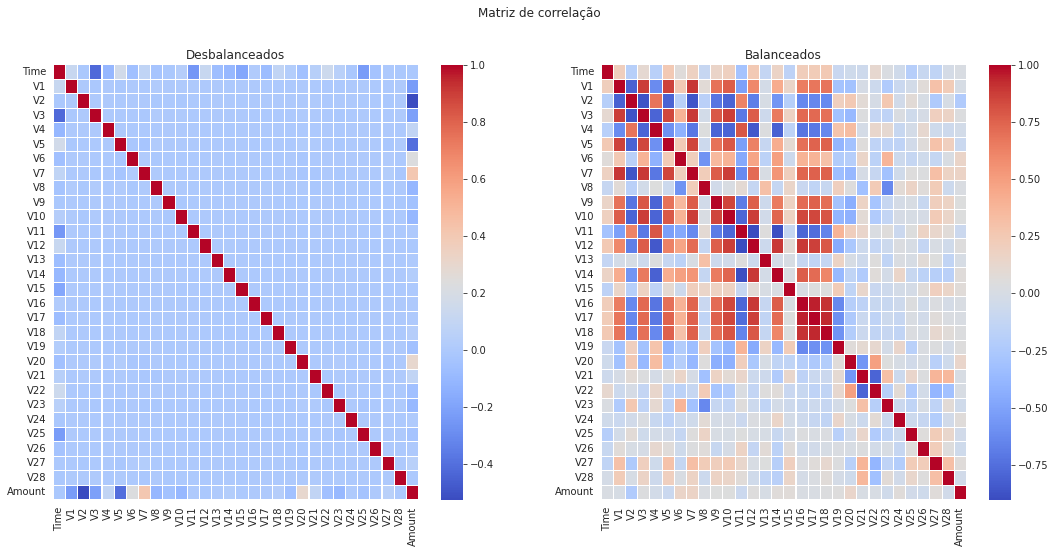

In [35]:
corr = X_train.corr()
corr_balanceado = pd.DataFrame(X_res).corr()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
fig.suptitle("Matriz de correlação")

sns.heatmap(corr,cmap='coolwarm', xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.1, ax=ax[0])
ax[0].set_title("Desbalanceados")


sns.heatmap(corr_balanceado,cmap='coolwarm', xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.1, ax=ax[1])
ax[1].set_title("Balanceados")

plt.show()

Além de o balanceamento ser útil para que o nosso modelo de machine learning aprenda a reconhecer não somente os casos lícititos, mas os ilícitos com precisão, ele também ele também nos ajuda a enxergar melhor a correlação existente entre as variáveis. Como podemos ver através do plot anterior, há uma alta relação positiva entre as variáveis `V1`-`V3`, `V16`-`V17` entre outras.

## Modelo de Machine Learning

Com os dados balanceados podemos dar sequência a fase de modelagem. Criaremos um classificador usando a Regressão Logística e outro usando Árvore de Decisão.

<p align=center>
<img src="https://d69wugzumdc3j.cloudfront.net/content/aa0c6f90-d498-11e9-a851-2f82f35cd214.png" width=50% >
</p>





### Logistic Regression

Regressão logística é um modelo de aprendizado supervisionado que com base no vetor de características de uma amostra usa a função sigmoide para fazer sua classificação.

A função sigmoide e seu gráfico são descritos na figura. 

<p align=center>
<img src="https://miro.medium.com/max/1280/1*OUOB_YF41M-O4GgZH_F2rw.png" width=40% >
</p>


$$
sigmoid(z) = \frac{1}{1 + e^{-z}}
$$

A variável $z$ da equação representa  a combinação dos atributos selecionados para instanciar o modelo. Já o resultado da função será entre 0 e 1, e a classificação será feita pela proximidade entre eles. Então quanto mais próximo de 1, o modelo será classificado como 1, do mesmo modo para o 0.



O modelo será instanciado, treinado usando os dados balanceados e por fim fará as previsões.

In [51]:
# Instanciar e Treinar
modelLR = LogisticRegression()
modelLR.fit(X_res, y_res)

# Prever
y_pred_LR  = modelLR.predict(X_val)
y_proba_LR = modelLR.predict_proba(X_val)

### Decision Tree

Árvore de decisão, assim como a regressão logística, é um modelo de aprendizado supervisionado.
O modelo usa as caracaterísticas das suas amostras para criar árvores, caminhos ou segmentos de dados mais específicos através da **seleção** dos atributos e usando o processo recursivo de dividir e conquistar. A divisão sempre resulta em dois subgrupos.



<p align=center>
<img src="https://cdn.corporatefinanceinstitute.com/assets/decision-trees-1024x927.png"
width=40% >
</p>



O objetivo desse processo é criar um segmento onde o resultado seja o mais puro possível, ou seja, um grupo onde haja a maior presença possível de apenas uma classe, com isso a nossa previsão será a mais acertiva possível.


In [47]:
modelDT = DecisionTreeClassifier()
modelDT.fit(X_res, y_res)
y_pred_DT = modelDT.predict(X_val)

## Avaliar Desempenho

<!-- <p align=center>
<img src="https://image.freepik.com/vetores-gratis/ilustracao-do-conceito-de-estrategia-social_114360-724.jpg"
width=40% >
</p> -->

<p align=center>
<img src="https://image.freepik.com/vetores-gratis/ilustracao-do-conceito-de-dados-visuais_114360-1912.jpg"
width=40% >
</p>





Como este é um problema, originalmente de dados desbalanceados, a acurácia não é uma métrica tão adequada, pois é possível ter uma acurácia global alta, mas uma baixa detecção de casos fraudulentos.

Podemos avaliar pela matriz de confusão para ver as taxas individuais de acertos e erros de cada classe, ou pela coluna *recall* do relatório de classificação.

Uma outra métrica interessante a se considerar é a AUC ROC, ou curva sobre a área, que além de ser eficiente para a avaliação da eficácia é útil para comparar diferentes modelos. Quanto mais próximo de 1 maior é a eficácia do modelo. 

Relatório de Classificação - Logistic Regression
               precision    recall  f1-score   support

           0       1.00      0.94      0.97     60417
           1       0.02      0.93      0.05       105

    accuracy                           0.94     60522
   macro avg       0.51      0.93      0.51     60522
weighted avg       1.00      0.94      0.97     60522

Acurácia: 0.9366
ROC: 0.935


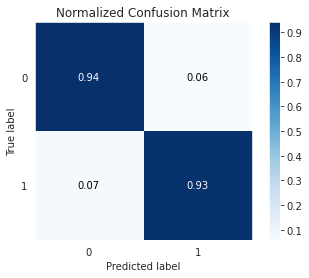

In [55]:
# Plotar matriz de confusão
skplt.metrics.plot_confusion_matrix(y_val, y_pred_LR, normalize=True)

# Relatório Classificação 
print("Relatório de Classificação - Logistic Regression\n", classification_report(y_val, y_pred_LR))

print("Acurácia: {:.4}".format(accuracy_score(y_val, y_pred_LR)))

print("ROC: {:.4}".format(roc_auc_score(y_val, y_pred_LR)))

Para o nosso modelo de Regressão Logística tivemos um acurácia de 93.66% e um recall de 93% para as previsões fraudulentas. 
O ROC obtivemos um valor de 93.5%

Relatório de Classificação - Decision Tree
               precision    recall  f1-score   support

           0       1.00      0.88      0.94     60417
           1       0.01      0.94      0.03       105

    accuracy                           0.88     60522
   macro avg       0.51      0.91      0.48     60522
weighted avg       1.00      0.88      0.94     60522

Acurácia: 0.8824
ROC:	  0.9126


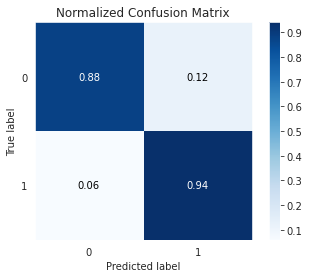

In [54]:
# Plotar matriz de confusão
skplt.metrics.plot_confusion_matrix(y_val, y_pred_DT, normalize=True)

# Relatório Classificação 
print("Relatório de Classificação - Decision Tree\n", classification_report(y_val, y_pred_DT))

print("Acurácia: {:.4}".format(accuracy_score(y_val, y_pred_DT)))

print("ROC:\t  {:.4}".format(roc_auc_score(y_val, y_pred_DT)))

Já para o nosso modelo de Árvore de decisão tivemos uma acurácia de 88.24%, inferior a nossa regressão logística, sua curva ROC com 91,26%, igualmente inferior. 

Porém a príncipal métrica que podemos usar para este problema seria o recall da classe 1,  pois o recall define em percentual os casos que realmente são fraudes e o nosso modelo consegue prever corretamente. Com isso foi obtido 94% de recall, ou seja, apesar das demais métricas, **o modelo de Árvore de Decisão se saiu superior!**

Vamos testar agora com o conjunto de teste separado no início do projeto. Agora testaremos os dados sem o balanceamento que fizemos para o treinamento, aqui estaremos testando os dados simulando um cenário real. Faremos apenas as padronizações necessárias quanto a normalização dos dados.


In [40]:
test_copy  = test.copy()

std_scaler = StandardScaler()

test['Amount'] = std_scaler.fit_transform(test['Amount'].values.reshape(-1, 1))
test['Time'] = std_scaler.fit_transform(test['Time'].values.reshape(-1,1))

X_test = test.drop('Class', axis=1)
y_test = test['Class']

y_pred_test = modelDT.predict(X_test)

Após padronizar os dados, separar entre Feature Matrix e Target Vector e fazer as previsões, podemos ver seus resultados


Relatório de Classificação
               precision    recall  f1-score   support

           0       1.00      0.88      0.94     42648
           1       0.01      0.96      0.03        73

    accuracy                           0.88     42721
   macro avg       0.51      0.92      0.48     42721
weighted avg       1.00      0.88      0.93     42721

Acurácia: 0.8797
AUC: 0.9192


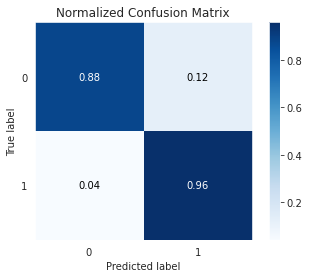

In [56]:
# Plotar matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test, normalize=True)

# Relatório Classificação 
print("Relatório de Classificação\n", classification_report(y_test, y_pred_test))

print("Acurácia: {:.4}".format(accuracy_score(y_test, y_pred_test)))

print("AUC: {:.4}".format(roc_auc_score(y_test, y_pred_test)))

Obtivemos um resultado ainda melhor no nosso conjunto de validação, 96% de recall é um valor **excelente!**

## Conclusão

Com o nosso modelo de regressão logística, conseguimos fazer previsões e acertas um grande número de operações fraudulentas.

Obtivemos dois resutlados expressivos, o primeiro é a precisão de 88%, que embora não seja tão alta, é melhor que um cenário sem previsão nenhuma. Então de todos os casos, de uma maneira global, conseguimos acertar 88% das previsões. O segundo resultado é o recall, onde foi obtido uma porcentagem de acertos de 96%, ou seja, **dos casos que realmente eram fraudes pudemos prever corretamente 96% deles** e isso é um valor excelente. 

Apesar dos bons resultados há várias maneiras de se otimizar, como  **otimizar os parâmetros selecionando** ou  usar **outros tipo de modelos de classificação**, como Decision Tree, Naive Bayes ou outros. 
